In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from scipy.spatial import ConvexHull, convex_hull_plot_2d

In [45]:
df = pd.read_csv('../../Results/Layer_Boundaries/PlanB/Test/SLD_0000733.vsi - 20x_01 Detections.txt', sep='	|\t', engine='python')

In [46]:
df.head()

,Image,Name,Class,Parent,ROI,Centroid X µm,Centroid Y µm,Area µm^2,Length µm,Circularity,...,Smoothed: 50 µm: Cluster mean: Delaunay: Max triangle area,Smoothed: 50 µm: Cluster size,Smoothed: 50 µm: Nearby detection counts,Distance to annotation with Layer 6 b µm,Distance to annotation with Layer 3 µm,Distance to annotation with Layer 1 µm,Distance to annotation with Layer 2 µm,Distance to annotation with Layer 4 µm,Distance to annotation with Layer 6 a µm,Distance to annotation with Layer 5 µm
0,SLD_0000733.vsi - 20x_01,Layer 5,Layer 5,S1HL,Polygon,5843.9,2882.9,404.7247,94.8008,0.5659,...,267.5440,9521.9971,32,624.8047,508.6877,996.4651,819.0421,283.4010,168.2905,0.0
1,SLD_0000733.vsi - 20x_01,Layer 5,Layer 5,S1HL,Polygon,5162.3,3023.6,386.1700,92.7241,0.5644,...,267.5441,9522.0020,30,1233.2239,349.5090,851.8026,638.2498,191.4112,831.1013,0.0
2,SLD_0000733.vsi - 20x_01,Layer 5,Layer 5,S1HL,Polygon,5996.1,2807.0,358.5164,90.6484,0.5483,...,267.5440,9521.9980,37,550.5585,483.9357,1003.8986,837.7945,328.6314,138.0601,0.0
3,SLD_0000733.vsi - 20x_01,Layer 5,Layer 5,S1HL,Polygon,5755.2,2874.7,346.9046,98.2593,0.4515,...,267.5441,9522.0020,34,706.4868,467.4880,950.9117,769.6846,233.6992,252.4514,0.0
4,SLD_0000733.vsi - 20x_01,Layer 5,Layer 5,S1HL,Polygon,6061.4,2780.0,342.8348,89.9551,0.5324,...,267.5441,9522.0000,33,527.3497,488.2429,1004.1270,842.5746,330.1198,126.8676,0.0


In [59]:
xs = df['Centroid X µm'].to_numpy(dtype=float)
ys = df['Centroid Y µm'].to_numpy(dtype=float)
X = np.vstack([xs, ys]).T

(9522, 2)


In [60]:
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)

In [63]:
nbrs.kneighbors_graph(X).toarray().shape

(9522, 9522)

In [47]:
layers_name =  ["Layer 1", "Layer 2", "Layer 3", "Layer 4", "Layer 5","Layer 6 a", "Layer 6 b"]

In [48]:
layer_points = {}
for layer_name in layers_name:
    layer = df[df["Class"] == layer_name]
    l1_Xs = layer['Centroid X µm'].to_numpy(dtype=float)
    l1_Ys = layer['Centroid Y µm'].to_numpy(dtype=float)
    layer_points[layer_name] = np.column_stack((l1_Xs, l1_Ys))

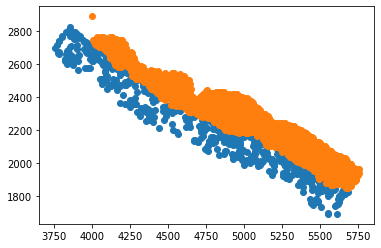

In [72]:
l1_cells = layer_points['Layer 1']
l1_Xs = l1_cells[:,0]
l1_Ys = l1_cells[:,1]
points = np.vstack([l1_Xs, l1_Ys]).T
plt.scatter(points[:,0], points[:,1])

l2_cells = layer_points['Layer 2']
l2_Xs = l2_cells[:,0]
l2_Ys = l2_cells[:,1]
points_2 = np.vstack([l2_Xs, l2_Ys]).T
plt.scatter(points_2[:,0], points_2[:,1])
plt.show()

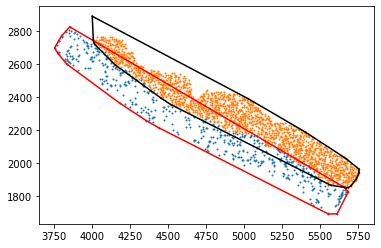

In [122]:
hull = ConvexHull(points)
plt.scatter(points[:,0], points[:,1], s=1)

for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], c='red')
    
    
hull2 = ConvexHull(points_2)
plt.scatter(points_2[:,0], points_2[:,1], s=1)

for simplex in hull2.simplices:
    plt.plot(points_2[simplex, 0], points_2[simplex, 1], 'k-')
plt.show()

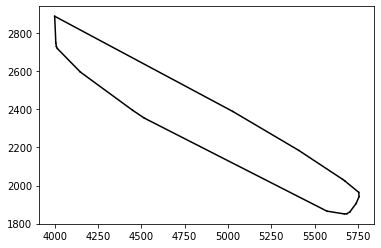

In [169]:
for simplex in hull2.simplices:
    plt.plot(points_2[simplex, 0], points_2[simplex, 1], 'k-')
plt.show()

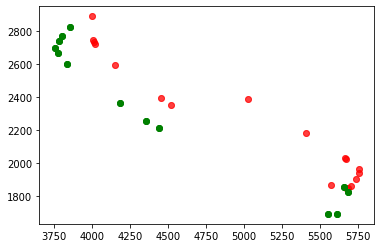

In [179]:
hull = ConvexHull(points)
hull2 = ConvexHull(points_2)
for simplex in hull2.simplices:
    plt.plot(points_2[simplex, 0], points_2[simplex, 1], 'o', c='red', alpha=.5)
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'o', c='green')
plt.show()

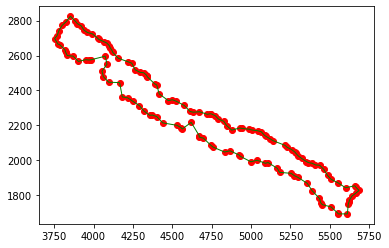

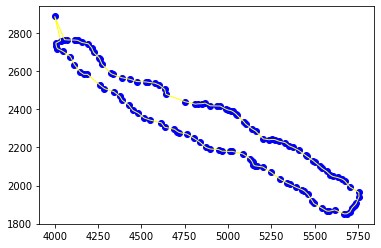

In [145]:
import alphashape
import matplotlib.pyplot as plt
from descartes import PolygonPatch

alpha = 0.95 * alphashape.optimizealpha(points)
hull = alphashape.alphashape(points, alpha)
hull_pts = hull.exterior.coords.xy

fig, ax = plt.subplots()
ax.scatter(hull_pts[0], hull_pts[1], color='red')
ax.add_patch(PolygonPatch(hull, fill=False, color='green'))


alpha = 0.95 * alphashape.optimizealpha(points_2)
hull = alphashape.alphashape(points_2, alpha)
hull_pts = hull.exterior.coords.xy

fig, ax = plt.subplots()
ax.scatter(hull_pts[0], hull_pts[1], color='blue')
ax.add_patch(PolygonPatch(hull, fill=False, color='yellow'))

In [180]:
import alphashape
import matplotlib.pyplot as plt
from descartes import PolygonPatch

alpha = 0.95 * alphashape.optimizealpha(points)
hull = alphashape.alphashape(points, alpha)
hull_pts = hull.exterior.coords.xy

#fig, ax = plt.subplots()
#ax.scatter(hull_pts[0], hull_pts[1], color='red')
#ax.add_patch(PolygonPatch(hull, fill=False, color='green'))


alpha = 0.95 * alphashape.optimizealpha(points_2)
hull = alphashape.alphashape(points_2, alpha)
hull_pts = hull.exterior.coords.xy

#fig, ax = plt.subplots()
#ax.scatter(hull_pts[0], hull_pts[1], color='blue')
#ax.add_patch(PolygonPatch(hull, fill=False, color='yellow'))


/home/jacquemi/working_dir/Rat_sscx_nissl/Venv_install/env-cellpose-py38/lib/python3.8/site-packages/shapely/ops.py:42: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  source = iter(source)
/home/jacquemi/working_dir/Rat_sscx_nissl/Venv_install/env-cellpose-py38/lib/python3.8/site-packages/alphashape/optimizealpha.py:41: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return all([polygon.intersects(point) for point in points])


KeyboardInterrupt: 

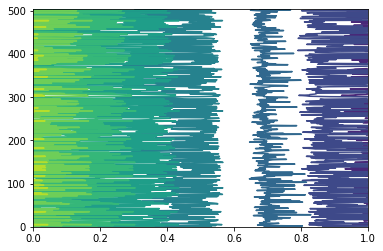

In [130]:
plt.contour(points)
#plt.scatter(points[:,0], points[:,1])
plt.show()

In [51]:
l2_cells = layer_points['Layer 2']
l2_Xs = l2_cells[:,0]
l2_Ys = l2_cells[:,1]

l3_cells = layer_points['Layer 3']
l3_Xs = l3_cells[:,0]
l3_Ys = l3_cells[:,1]

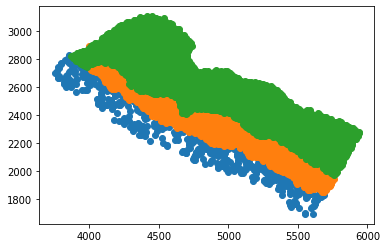

In [53]:
plt.scatter(l1_Xs, l1_Ys, cmap='Reds')
plt.scatter(l2_Xs, l2_Ys)
plt.scatter(l3_Xs, l3_Ys)
plt.show()

In [30]:
width = l1_Xs.max() - l1_Xs.min()
step = width / 20

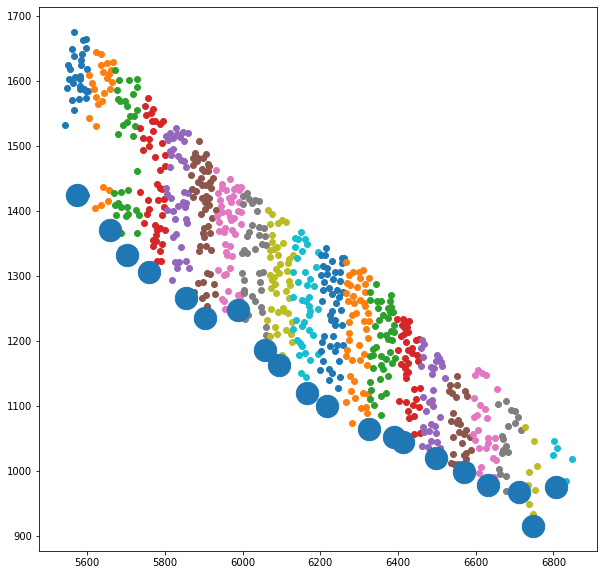

In [31]:
plt.figure(figsize=[10,10])
higher_cells = []
current_x = l1_Xs.min()
while current_x < l1_Xs.max()-step:
    current_cells = l1_cells[np.logical_and(l1_cells[:,0] > current_x,  l1_cells[:,0] < current_x + step)]
    plt.scatter(current_cells[:,0], current_cells[:,1])
    higher_cells.append(current_cells[current_cells[:,1].argmin()])   
    current_x = current_x + step
higher_cells = np.array(higher_cells)    
plt.scatter(higher_cells[:,0], higher_cells[:,1],cmap='Reds', s=500)
plt.show()
    
    

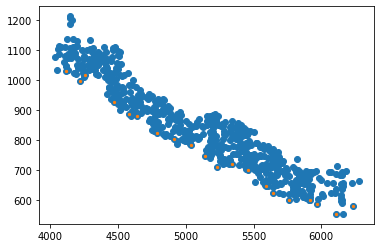

In [23]:

plt.scatter(l1_cells[:,0], l1_cells[:,1])
plt.scatter(higher_cells[:,0], higher_cells[:,1],cmap='Reds', s=5)

In [11]:
higher_cells[:,1].mean()

776.2738775510205

In [32]:
df.kel1_Ys()

Index(['Image', 'Name', 'Class', 'Parent', 'ROI', 'Centroid X µm',
       'Centroid Y µm', 'Area µm^2', 'Length µm', 'Solidity',
       ...
       'Smoothed: 50 µm: Cluster size', 'Smoothed: 50 µm: Circularity',
       'Smoothed: 50 µm: Nearby detection counts',
       'Distance to annotation with Layer 6 b µm',
       'Distance to annotation with Layer 1 µm',
       'Distance to annotation with Layer 4 µm',
       'Distance to annotation with Layer 6 a µm',
       'Distance to annotation with Layer 5 µm',
       'Distance to annotation with Layer 3 µm', 'Circularity'],
      dtype='object', length=120)

In [37]:
layer = df[df["Class"] == "Layer 3"]

In [38]:
layer

,Image,Name,Class,Parent,ROI,Centroid X µm,Centroid Y µm,Area µm^2,Length µm,Solidity,...,Smoothed: 50 µm: Cluster size,Smoothed: 50 µm: Circularity,Smoothed: 50 µm: Nearby detection counts,Distance to annotation with Layer 6 b µm,Distance to annotation with Layer 1 µm,Distance to annotation with Layer 4 µm,Distance to annotation with Layer 6 a µm,Distance to annotation with Layer 5 µm,Distance to annotation with Layer 3 µm,Circularity


In [109]:
from skimage import measure
x = np.array(points[:,0]).reshape(-1,1)
y = np.array(points[:,1]).reshape(1,-1)
#x, y = np.ogrid[-np.pi:np.pi:100j, -np.pi:np.pi:100j]

In [110]:
print(x.shape)
print(y.shape)

(504, 1)
(1, 504)


In [111]:
r = np.sin(np.exp((np.sin(x)**3 + np.cos(y)**2)))
r.shape

(504, 504)

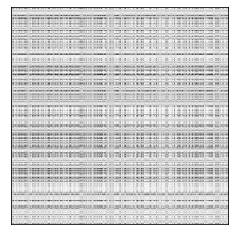

In [113]:
# Find contours at a constant value of 0.8
contours = measure.find_contours(r, 0.8)

# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(r, cmap=plt.cm.gray)

#for contour in contours:
#    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

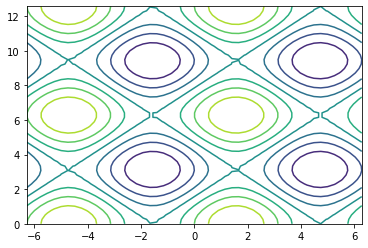

In [146]:
df.head()

,Image,Name,Class,Parent,ROI,Centroid X µm,Centroid Y µm,Area µm^2,Length µm,Circularity,...,Smoothed: 50 µm: Cluster mean: Delaunay: Max triangle area,Smoothed: 50 µm: Cluster size,Smoothed: 50 µm: Nearby detection counts,Distance to annotation with Layer 6 b µm,Distance to annotation with Layer 3 µm,Distance to annotation with Layer 1 µm,Distance to annotation with Layer 2 µm,Distance to annotation with Layer 4 µm,Distance to annotation with Layer 6 a µm,Distance to annotation with Layer 5 µm
0,SLD_0000733.vsi - 20x_01,Layer 5,Layer 5,S1HL,Polygon,5843.9,2882.9,404.7247,94.8008,0.5659,...,267.5440,9521.9971,32,624.8047,508.6877,996.4651,819.0421,283.4010,168.2905,0.0
1,SLD_0000733.vsi - 20x_01,Layer 5,Layer 5,S1HL,Polygon,5162.3,3023.6,386.1700,92.7241,0.5644,...,267.5441,9522.0020,30,1233.2239,349.5090,851.8026,638.2498,191.4112,831.1013,0.0
2,SLD_0000733.vsi - 20x_01,Layer 5,Layer 5,S1HL,Polygon,5996.1,2807.0,358.5164,90.6484,0.5483,...,267.5440,9521.9980,37,550.5585,483.9357,1003.8986,837.7945,328.6314,138.0601,0.0
3,SLD_0000733.vsi - 20x_01,Layer 5,Layer 5,S1HL,Polygon,5755.2,2874.7,346.9046,98.2593,0.4515,...,267.5441,9522.0020,34,706.4868,467.4880,950.9117,769.6846,233.6992,252.4514,0.0
4,SLD_0000733.vsi - 20x_01,Layer 5,Layer 5,S1HL,Polygon,6061.4,2780.0,342.8348,89.9551,0.5324,...,267.5441,9522.0000,33,527.3497,488.2429,1004.1270,842.5746,330.1198,126.8676,0.0


In [160]:
cell_df = df[["Class", 'Centroid X µm', 'Centroid Y µm']]

In [162]:
cell_df.head()

,Class,Centroid X µm,Centroid Y µm
0,Layer 5,5843.9,2882.9
1,Layer 5,5162.3,3023.6
2,Layer 5,5996.1,2807.0
3,Layer 5,5755.2,2874.7
4,Layer 5,6061.4,2780.0


In [188]:
from scipy.spatial.distance import cdist
def closest_node(node, nodes):
    return cdist([node], nodes).argmin()

In [214]:
def neigboor_nodes(node, nodes):
    x_mask = np.logical_and(nodes[0] > (node[0] - 10), nodes[0] < (node[0] + 10))
    #y_mask = np.logical_and(nodes[1] > (node[1] - 10), nodes[1] < (node[1] + 10))
    #print(y_mask.shape)
    #mask = np.logical_and(x_mask, y_mask)
    #print(mask.shape)
    #return nodes[mask]
    print (x_mask.shape)

In [247]:
Xs = cell_df['Centroid X µm'].to_numpy(dtype=float)
Ys = cell_df['Centroid Y µm'].to_numpy(dtype=float)
points = np.column_stack((Xs, Ys))

In [317]:
borders_cells = []
for index, row in cell_df.iterrows():
    current_x = row['Centroid X µm']
    current_y = row['Centroid Y µm']
    current_class = row['Class']
    #dfy = cell_df.iloc[(cell_df['Centroid Y µm']-current_y).abs().argsort()[:2]]
    dfy = cell_df[abs(cell_df['Centroid Y µm']-current_y) < 20]
    df = dfy[abs(dfy['Centroid X µm']-current_x) < 20]
    

    #print("--------------------------------------")
    #print(current_class, current_x, current_y)
    #print(df)
    #print(df[df['Class'] != current_class])
    
    if df[df['Class'] != current_class].size > 0:
        borders_cells.append([row['Centroid X µm'], row['Centroid Y µm']])
        #print('Add to border cell')
    #print("--------------------------------------")
        
    

    

In [318]:
borders_cells = np.array(borders_cells)

In [319]:
borders_cells.shape

(1142, 2)

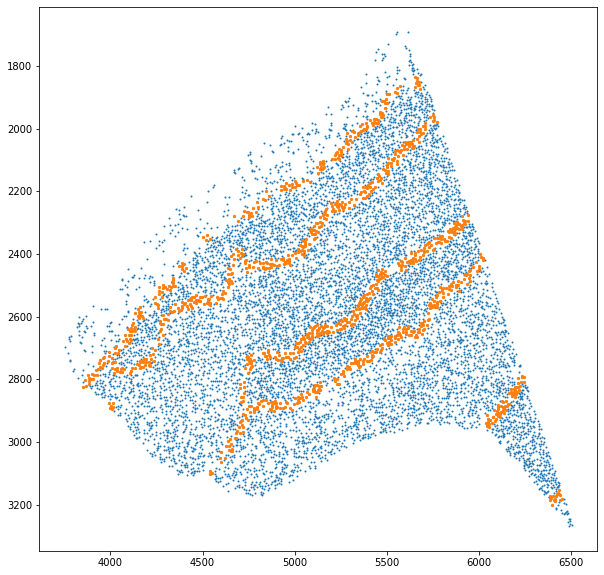

In [322]:
plt.figure(figsize=[10,10])
plt.scatter(points[:,0], points[:,1], s=1)
plt.scatter(borders_cells[:,0], borders_cells[:,1], s=5)
plt.gca().invert_yaxis()

In [275]:
!pwd

/home/jacquemi/working_dir/Rat_sscx_nissl/rat_sscx_nissl_analysis/Notebooks
